# Memphis Police Department's Public Safety Incidents

This note book demonstrates how to clean the data.

In [91]:
import arcpy

In [92]:
arcpy.env.workspace = r"C:\Users\ryan.hanson\OneDrive - City of Memphis\GIS\ArcProjects\Police_Incidents_Public_Safety\Police_Incidents_Public_Safety.gdb"
arcpy.env.overwriteOutput = True

In [93]:
csv = r'C:\Users\ryan.hanson\OneDrive - City of Memphis\GIS\ArcProjects\Police_Incidents_Public_Safety\Police_Incidents_Public_Safety.file.csv'

In [94]:
arcpy.CoordinateTableToPoint_defense(csv, 'all_incidents', "coord2", "DD_2", "coord1")

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\all_incidents'>

In [83]:
#There are about 1.5 million incidents. Not all the incidents are located in the Memphis 
#area. A filter is set up to only select records that are ploted in the Memphis MSA.

arcpy.SelectLayerByLocation_management('all_incidents', 'have_their_center_in', 'Memphis_MSA')

id,value
0,a Layer object
1,all_incidents
2,1377470


In [84]:
# That culls it down tow about 1.37 millioin. Let's save those as a new file.

arcpy.FeatureClassToFeatureClass_conversion('all_incidents', 
                                            arcpy.env.workspace, 
                                            'all_incidents_local')

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\all_incidents_local'>

In [86]:
# The date is stored as a string. Let's create a new date type field and populate it
# with the string value. This has to be done in two different cells because of locking.

arcpy.management.AddField('all_incidents_local', 'odate', 'DATE')

<Result 'all_incidents_local'>

In [87]:
arcpy.management.CalculateField('all_incidents_local', 'odate', '!offense_date!', 'PYTHON3')

<Result 'all_incidents_local'>

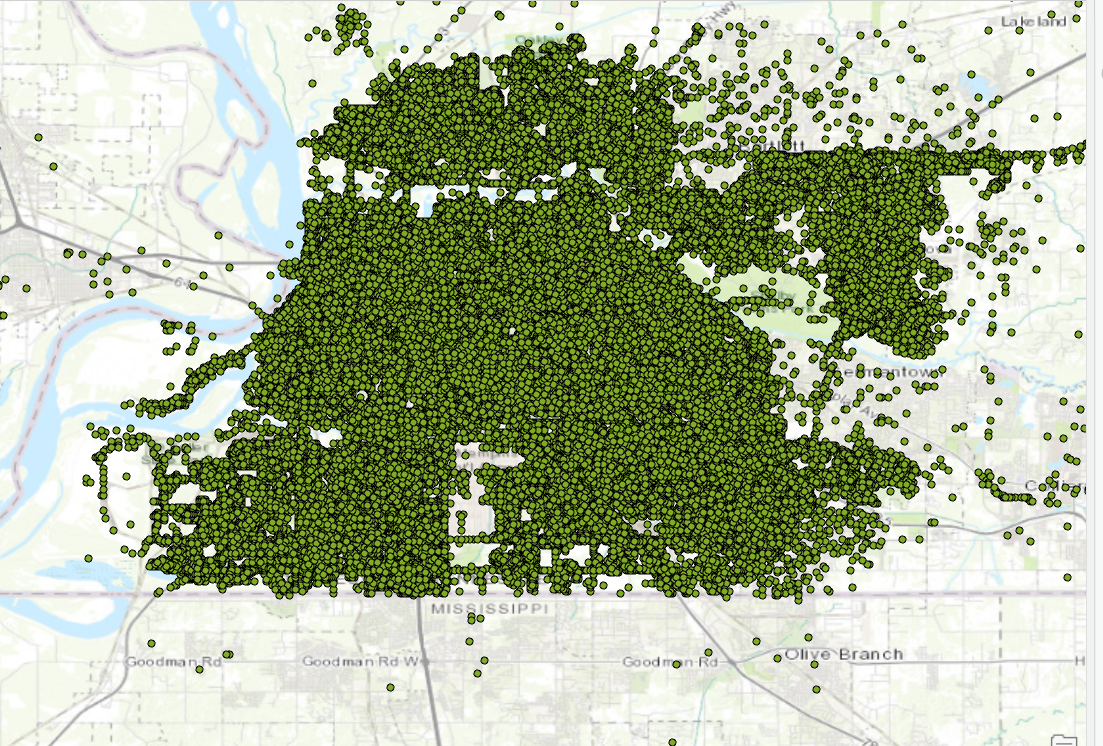

In [90]:
# Here is what the data looks like. Not very useful. Let's do some further analysis!

from IPython.display import Image
Image("all_incidents.png")

